# Modelo de regresión lineal

por Mónica Tatiana Gutierrez Ballen

version 1.0, Agosto 2021

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools

plt.style.use('ggplot')

In [2]:
# Download and load the update dataset.
urlDataset = 'https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/houses_prices_prediction.csv.zip'
data = pd.read_csv(urlDataset)
data.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
data.columns

Index(['area', 'bedroom', ' price'], dtype='object')

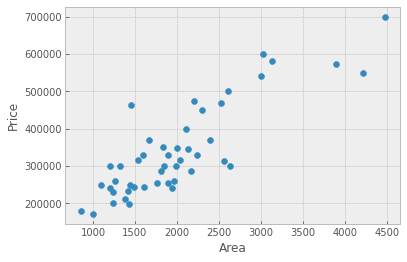

In [4]:
plt.style.use('bmh')
y = data[' price'].values
X = data['area'].values
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Normalizamos los datos...

## $$ x = \frac{x -\overline x}{\sigma_x} $$ 

Text(0, 0.5, 'Price')

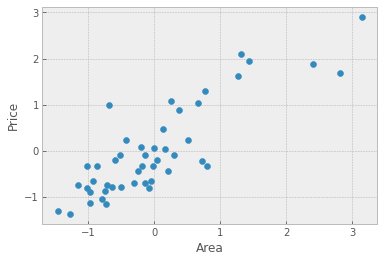

In [5]:
y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/ y_std
X = (X - X_mean)/ X_std

plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')

## Forma de una regresión lineal

## $$h_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

- $h_\beta(x)$ es la variable respuesta
- $\beta_0$ es el intercepto
- $\beta_1$ es el coeficiente para $x_1$ (la primera variable)
- $\beta_n$ es el coeficiente para $x_n$ (la n variable)

Los valores de  $\beta$ son llamados como **coeficientes del modelo**:

- Estos valores son estimados (o "aprendidos") durante el proceso de estimación del modelo usando el **criterio de mínimos cuadrados**.
- En concreto, se trata de encontrar la línea (matemáticamente) que minimiza la **suma de residuos al cuadrado** (o "suma de errores al cuadrado").
- Y una vez que hemos aprendido estos coeficientes, podemos utilizar el modelo para predecir la respuesta.

![Estimating coefficients](https://raw.githubusercontent.com/justmarkham/DAT8/master/notebooks/images/estimating_coefficients.png)

En el diagrama anterior:

- Los puntos negros son los **valores observados** de x e y.
- La línea azul es nuestra **línea de mínimos cuadrados**.
- Las líneas rojas son los **residuos**, que son las distancias verticales entre los valores observados y la línea de mínimos cuadrados.

### Función de coste

El objetivo se convirtió en estimar los parámetros $\beta$ que minimice la suma de los residuos al cuadrado

## $$J(\beta_0, \beta_1)=\frac{1}{2n}\sum_{i=1}^n (h_\beta(x_i)-y_i)^2$$

In [6]:
?np.c_

In [7]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]
print(X_)

[[ 1.00000000e+00  1.31415422e-01]
 [ 1.00000000e+00 -5.09640698e-01]
 [ 1.00000000e+00  5.07908699e-01]
 [ 1.00000000e+00 -7.43677059e-01]
 [ 1.00000000e+00  1.27107075e+00]
 [ 1.00000000e+00 -1.99450507e-02]
 [ 1.00000000e+00 -5.93588523e-01]
 [ 1.00000000e+00 -7.29685755e-01]
 [ 1.00000000e+00 -7.89466782e-01]
 [ 1.00000000e+00 -6.44465993e-01]
 [ 1.00000000e+00 -7.71822042e-02]
 [ 1.00000000e+00 -8.65999486e-04]
 [ 1.00000000e+00 -1.40779041e-01]
 [ 1.00000000e+00  3.15099326e+00]
 [ 1.00000000e+00 -9.31923697e-01]
 [ 1.00000000e+00  3.80715024e-01]
 [ 1.00000000e+00 -8.65782986e-01]
 [ 1.00000000e+00 -9.72625673e-01]
 [ 1.00000000e+00  7.73743478e-01]
 [ 1.00000000e+00  1.31050078e+00]
 [ 1.00000000e+00 -2.97227261e-01]
 [ 1.00000000e+00 -1.43322915e-01]
 [ 1.00000000e+00 -5.04552951e-01]
 [ 1.00000000e+00 -4.91995958e-02]
 [ 1.00000000e+00  2.40309445e+00]
 [ 1.00000000e+00 -1.14560907e+00]
 [ 1.00000000e+00 -6.90255715e-01]
 [ 1.00000000e+00  6.68172729e-01]
 [ 1.00000000e+00  2

Supongamos los siguientes betas

In [8]:
beta_ini = np.array([-1, 1])
print(beta_ini)

[-1  1]


In [9]:
# h
def lr_h(beta,x):
    return np.dot(beta, x.T)


In [10]:
# Plot the linear regression
x = np.c_[np.ones(2), [X.min(), X.max()]]
print(x)
lr_h(beta_ini,x)

[[ 1.         -1.46104938]
 [ 1.          3.15099326]]


array([-2.46104938,  2.15099326])

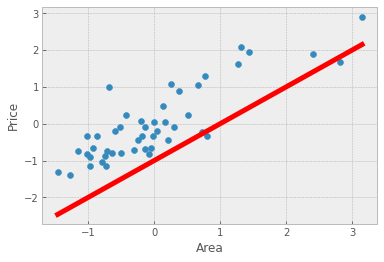

In [11]:
# scatter plot
plt.scatter(X, y)
plt.plot(x[:, 1], lr_h(beta_ini, x), 'r', lw=5)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Calculemos el error de dicha regresión

In [12]:
# Cost function
def lr_cost_func(beta, x, y):
    # Can be vectorized
    res = 0
    for i in range(x.shape[0]):
        res += (lr_h(beta,x[i, :]) - y[i]) ** 2
    res *= 1 / (2*x.shape[0])
    return res
lr_cost_func(beta_ini, X_, y)

0.6450124071218747

### Entender la función de coste

Veamos cómo es la función de coste para diferentes valores de $\beta$

Variemos $\beta_0$

In [13]:
beta0 = np.arange(-15, 20, 1)
beta1 = 2
print(beta0)
print(beta1)

[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19]
2


Text(0, 0.5, 'J(beta)')

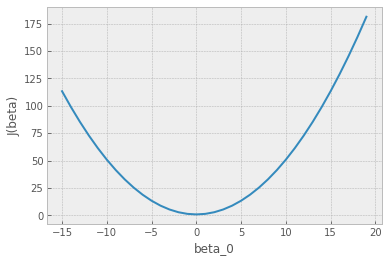

In [14]:
cost_func=[]
for beta_0 in beta0:
    cost_func.append(lr_cost_func(np.array([beta_0, beta1]), X_, y) )

plt.plot(beta0, cost_func)
plt.xlabel('beta_0')
plt.ylabel('J(beta)')

Ahora variemos $\beta_1$

In [15]:
beta0 = 0
beta1 = np.arange(-15, 20, 1)
print(beta0)
print(beta1)

0
[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19]


Text(0, 0.5, 'J(beta)')

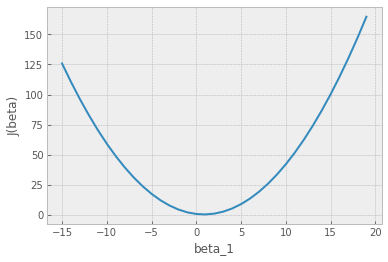

In [16]:
cost_func=[]
for beta_1 in beta1:
    cost_func.append(lr_cost_func(np.array([beta0, beta_1]), X_, y) )

plt.plot(beta1, cost_func)
plt.xlabel('beta_1')
plt.ylabel('J(beta)')

Analicemos ambos al mismo tiempo

In [17]:
beta0 = np.arange(-5, 7, 0.2)
beta1 = np.arange(-5, 7, 0.2)
print(beta0)
print(beta1)

[-5.0000000e+00 -4.8000000e+00 -4.6000000e+00 -4.4000000e+00
 -4.2000000e+00 -4.0000000e+00 -3.8000000e+00 -3.6000000e+00
 -3.4000000e+00 -3.2000000e+00 -3.0000000e+00 -2.8000000e+00
 -2.6000000e+00 -2.4000000e+00 -2.2000000e+00 -2.0000000e+00
 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00 -1.2000000e+00
 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01 -4.0000000e-01
 -2.0000000e-01  4.4408921e-15  2.0000000e-01  4.0000000e-01
  6.0000000e-01  8.0000000e-01  1.0000000e+00  1.2000000e+00
  1.4000000e+00  1.6000000e+00  1.8000000e+00  2.0000000e+00
  2.2000000e+00  2.4000000e+00  2.6000000e+00  2.8000000e+00
  3.0000000e+00  3.2000000e+00  3.4000000e+00  3.6000000e+00
  3.8000000e+00  4.0000000e+00  4.2000000e+00  4.4000000e+00
  4.6000000e+00  4.8000000e+00  5.0000000e+00  5.2000000e+00
  5.4000000e+00  5.6000000e+00  5.8000000e+00  6.0000000e+00
  6.2000000e+00  6.4000000e+00  6.6000000e+00  6.8000000e+00]
[-5.0000000e+00 -4.8000000e+00 -4.6000000e+00 -4.4000000e+00
 -4.2000000e+00 -4.0000

In [18]:
cost_func = pd.DataFrame(index=beta0, columns=beta1)

for beta_0 in beta0:
    for beta_1 in beta1:
        cost_func.loc[beta_0, beta_1] = lr_cost_func(np.array([beta_0, beta_1]), X_, y)
print(cost_func)

                    -5.0      -4.8       -4.6       -4.4       -4.2      -4.0  \
-5.000000e+00  29.774938  28.62394  27.512943  26.441945  25.410948  24.41995   
-4.800000e+00  28.794938  27.64394  26.532943  25.461945  24.430948  23.43995   
-4.600000e+00  27.854938  26.70394  25.592943  24.521945  23.490948  22.49995   
-4.400000e+00  26.954938  25.80394  24.692943  23.621945  22.590948  21.59995   
-4.200000e+00  26.094938  24.94394  23.832943  22.761945  21.730948  20.73995   
-4.000000e+00  25.274938  24.12394  23.012943  21.941945  20.910948  19.91995   
-3.800000e+00  24.494938  23.34394  22.232943  21.161945  20.130948  19.13995   
-3.600000e+00  23.754938  22.60394  21.492943  20.421945  19.390948  18.39995   
-3.400000e+00  23.054938  21.90394  20.792943  19.721945  18.690948  17.69995   
-3.200000e+00  22.394938  21.24394  20.132943  19.061945  18.030948  17.03995   
-3.000000e+00  21.774938  20.62394  19.512943  18.441945  17.410948  16.41995   
-2.800000e+00  21.194938  20

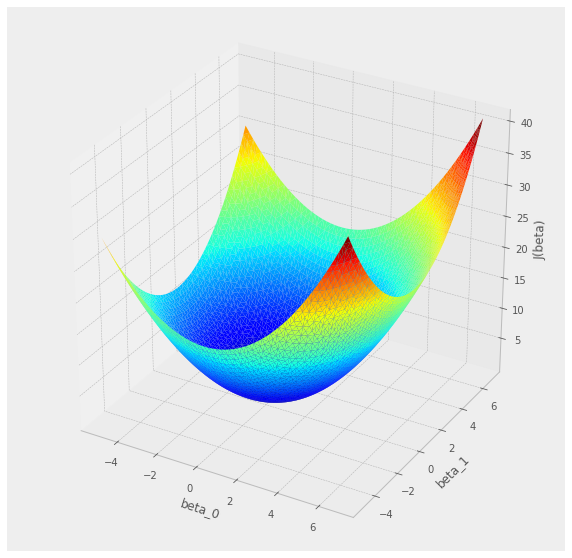

In [19]:
betas = np.transpose([np.tile(beta0, beta1.shape[0]), np.repeat(beta1, beta0.shape[0])])
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(betas[:, 0], betas[:, 1], cost_func.T.values.flatten().astype('float'), cmap=cm.jet, linewidth=0.1)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')
ax.set_zlabel('J(beta)')
plt.show()

También puede verse como un gráfico de contorno

Text(0, 0.5, 'beta_1')

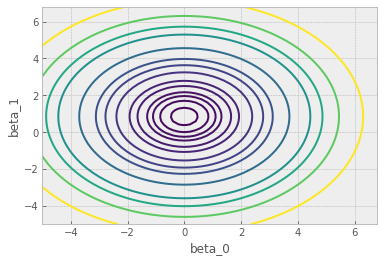

In [20]:
contour_levels = [0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10, 12, 15, 20]
plt.contour(beta0, beta1, cost_func.T.values, contour_levels)
plt.xlabel('beta_0')
plt.ylabel('beta_1')

Entendamos cómo se observan los diferentes valores de las betas en el gráfico de contorno

In [21]:
betas = np.array([[0, 0],
                 [-1, -1],
                 [-5, 5],
                 [3, -2]])



Linear Regression with betas  [0 0]


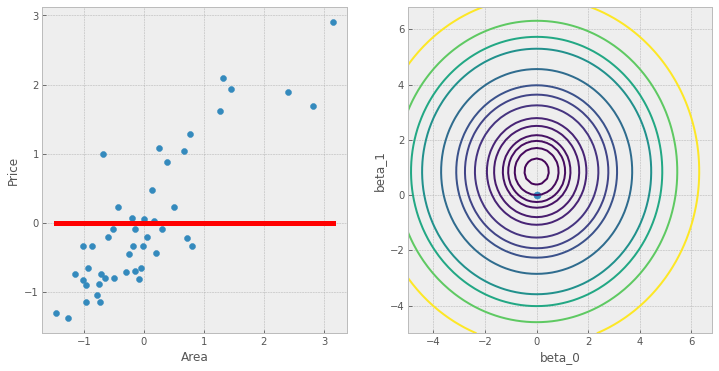



Linear Regression with betas  [-1 -1]


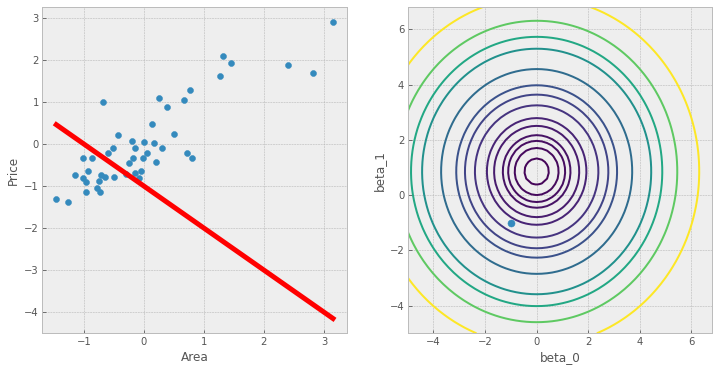



Linear Regression with betas  [-5  5]


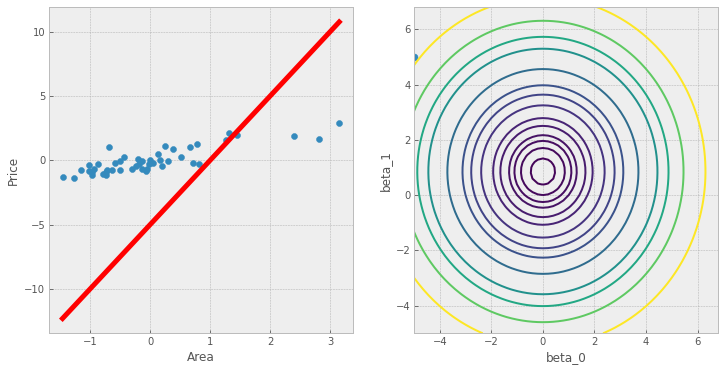



Linear Regression with betas  [ 3 -2]


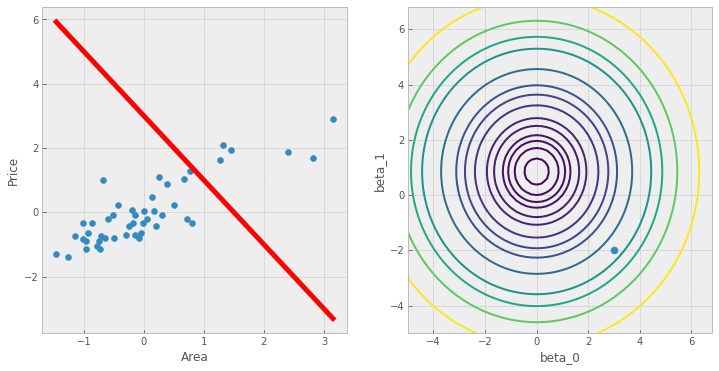

In [22]:
for beta in betas:
    print('\n\nLinear Regression with betas ', beta)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
    ax2.contour(beta0, beta1, cost_func.T.values, contour_levels)
    ax2.set_xlabel('beta_0')
    ax2.set_ylabel('beta_1')
    ax2.scatter(beta[0], beta[1], s=50)

    # scatter plot
    ax1.scatter(X, y)

    # Plot the linear regression
    x = np.c_[np.ones(2), [X.min(), X.max()]]
    ax1.plot(x[:, 1], lr_h(beta, x), 'r', lw=5)
    ax1.set_xlabel('Area')
    ax1.set_ylabel('Price')
    plt.show()

## Gradiente descente

- Tener alguna función $J(\beta_0, \beta_1)$

- Querer $\min_{beta_0, \beta_1}J(\beta_0, \beta_1)$

Proceso:

* Comenzar con algunos $\beta_0, \beta_1$

* Seguir cambiando $\beta_0, \beta_1$ para reducir $J(\beta_0, \beta_1)$
hasta que, con suerte, acabe en un mínimo

### Algoritmo de descenso gradual

Repetir hasta la convergencia

## $$ \beta_j := \beta_j - \alpha \frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1)$$

mientras se actualiza simultáneamente β0 y β1

$\alpha$ se denomina tasa de aprendizaje

Para el caso particular de la regresión lineal con una variable y una intercepción, el gradiente se calcula como

### $$\frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1) = \frac{\partial }{\partial \beta_j} \frac{1}{2n}\sum_{i=1}^n (h_\beta(x_i)-y_i)^2$$

### $$\frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1) = \frac{\partial }{\partial \beta_j} \frac{1}{2n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)^2$$

### $ j = 0: \frac{\partial }{\partial \beta_0} =  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)$

### $ j = 1: \frac{\partial }{\partial \beta_1} =  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i) \cdot x_i$



Repetir la convergencia{

### $ \beta_0 := \beta_0- \alpha  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)$

### $ \beta_1 := \beta_1- \alpha   \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i) \cdot x_i$
}

simultáneamente!

### Calculemos la gradiente

In [23]:
def gradient(beta, x, y):
    # Not vectorized
    gradient_0  = 1 / x.shape[0] * ((lr_h(beta, x) - y).sum())
    gradient_1  = 1 / x.shape[0] * ((lr_h(beta, x) - y)* x[:, 1]).sum()

    return np.array([gradient_0, gradient_1])

In [24]:
# gradient calculation
beta_ini = np.array([-1.5, 0.])

print(X_)
print(y)


[[ 1.00000000e+00  1.31415422e-01]
 [ 1.00000000e+00 -5.09640698e-01]
 [ 1.00000000e+00  5.07908699e-01]
 [ 1.00000000e+00 -7.43677059e-01]
 [ 1.00000000e+00  1.27107075e+00]
 [ 1.00000000e+00 -1.99450507e-02]
 [ 1.00000000e+00 -5.93588523e-01]
 [ 1.00000000e+00 -7.29685755e-01]
 [ 1.00000000e+00 -7.89466782e-01]
 [ 1.00000000e+00 -6.44465993e-01]
 [ 1.00000000e+00 -7.71822042e-02]
 [ 1.00000000e+00 -8.65999486e-04]
 [ 1.00000000e+00 -1.40779041e-01]
 [ 1.00000000e+00  3.15099326e+00]
 [ 1.00000000e+00 -9.31923697e-01]
 [ 1.00000000e+00  3.80715024e-01]
 [ 1.00000000e+00 -8.65782986e-01]
 [ 1.00000000e+00 -9.72625673e-01]
 [ 1.00000000e+00  7.73743478e-01]
 [ 1.00000000e+00  1.31050078e+00]
 [ 1.00000000e+00 -2.97227261e-01]
 [ 1.00000000e+00 -1.43322915e-01]
 [ 1.00000000e+00 -5.04552951e-01]
 [ 1.00000000e+00 -4.91995958e-02]
 [ 1.00000000e+00  2.40309445e+00]
 [ 1.00000000e+00 -1.14560907e+00]
 [ 1.00000000e+00 -6.90255715e-01]
 [ 1.00000000e+00  6.68172729e-01]
 [ 1.00000000e+00  2

In [25]:
gradient(beta_ini, X_, y)

array([-1.5       , -0.85498759])

### Calculemos el algoritmo de gradiente descendiente

In [26]:
def gradient_descent(x, y, beta_ini, alpha, iters): 
    betas = np.zeros((iters, beta_ini.shape[0] + 1))

    beta = beta_ini
    for iter_ in range(iters):

        betas[iter_, :-1] = beta
        betas[iter_, -1] = lr_cost_func(beta, x, y)
        beta -= alpha * gradient(beta, x, y)
        
    return betas

In [27]:
iters = 100
alpha = 0.05
beta_ini = np.array([-4., -4.])

betas =  gradient_descent(X_, y, beta_ini, alpha, iters)

Veamos la evolución del coste por iteración

Text(0, 0.5, 'J(beta)')

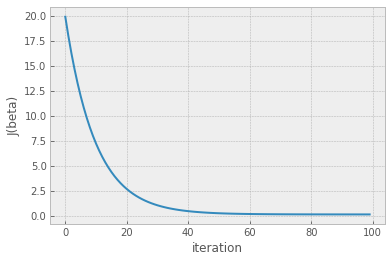

In [28]:
plt.plot(range(iters), betas[:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)')

Comprender lo que hace en cada iteración

In [61]:
betas_ = betas[range(0, iters, 10), :-1]
betas_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.29919716e-16,  4.78822687e-01,  3.75294102e-01],
       [-1.19289921e-16,  5.24813257e-01,  3.29303533e-01],
       [-1.10431758e-16,  5.65674096e-01,  2.88442694e-01],
       [-1.18699377e-16,  6.01977369e-01,  2.52139421e-01],
       [-1.19289921e-16,  6.34231421e-01,  2.19885369e-01],
       [-1.04526317e-16,  6.62887897e-01,  1.91228893e-01],
       [-1.21652097e-16,  6.88348066e-01,  1.65768724e-01],
       [-1.06297949e-16,  7.10968440e-01,  1.43148350e-01],
       [-1.08069582e-16,  7.31065766e-01,  1.23051024e-01],
       [-1.00392508e-16,  7.48921461e-01,  1.05195328e-01],
       [-9.38965218e-17,  7.64785556e-01,  8.93312341e-02],
       [-1.13384479e-16,  7.78880189e-01,  7.52366009e-02],
       [-1.03345228e-16,  7.91402724e-01,  6.27140653e-02],
       [-9.33059776e-17,  8.02528512e-01,  5.15882774e-02],
       [-9.68492426e-17,  8.12413344e-01,  4.17034458e-02],
       [-8.68099918e-17,  8.21195634e-01



Linear Regression with betas  [-4. -4.]


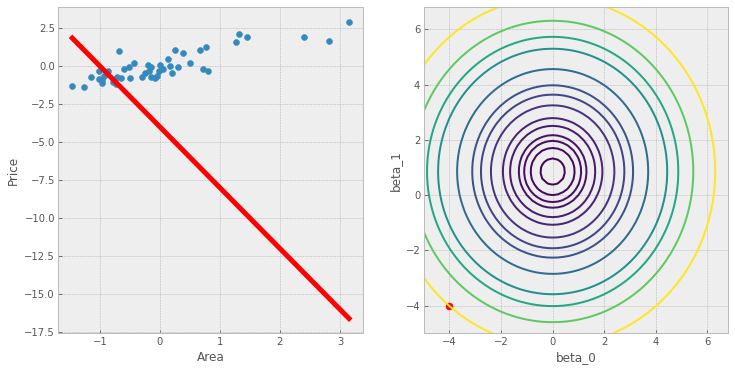



Linear Regression with betas  [-2.39494776 -2.05187282]


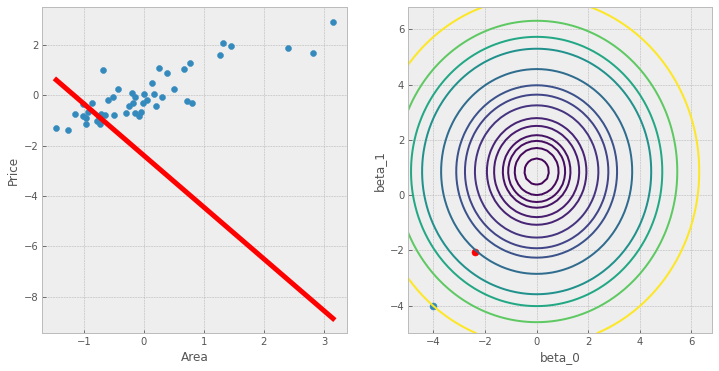



Linear Regression with betas  [-1.43394369 -0.88545711]


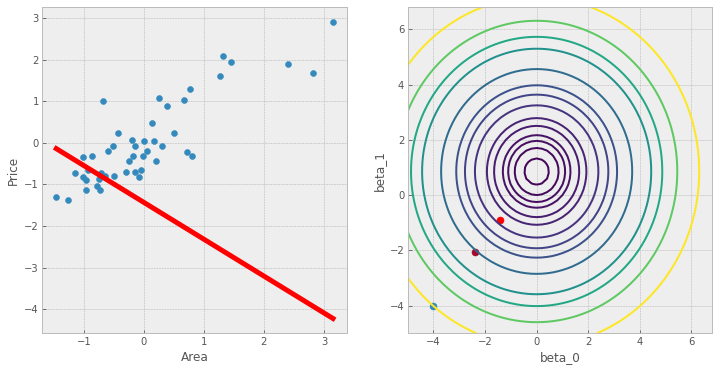



Linear Regression with betas  [-0.85855506 -0.18708094]


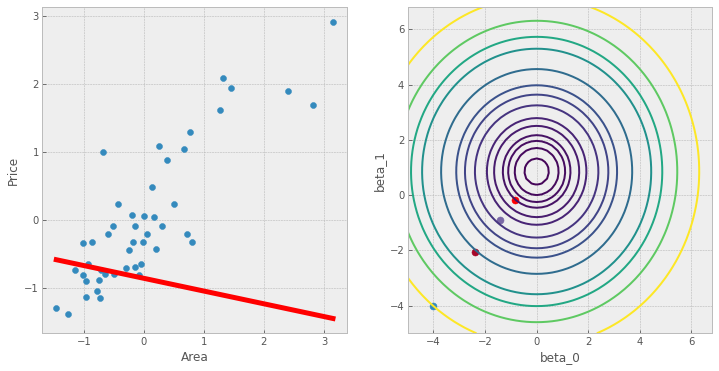



Linear Regression with betas  [-0.51404863  0.23106267]


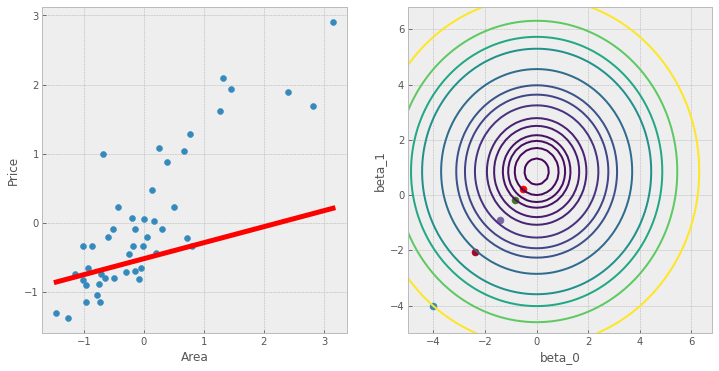



Linear Regression with betas  [-0.3077799   0.48142069]


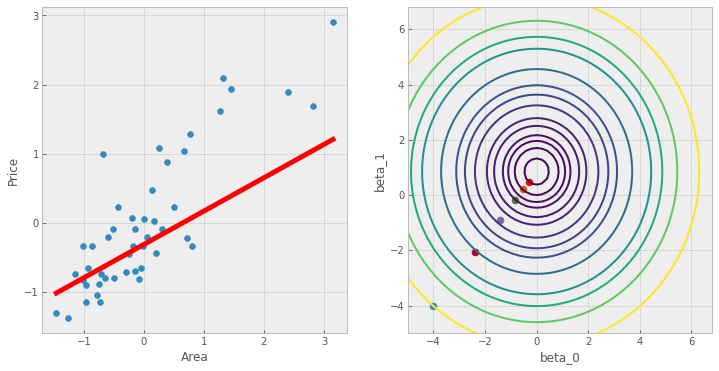



Linear Regression with betas  [-0.1842792   0.63131929]


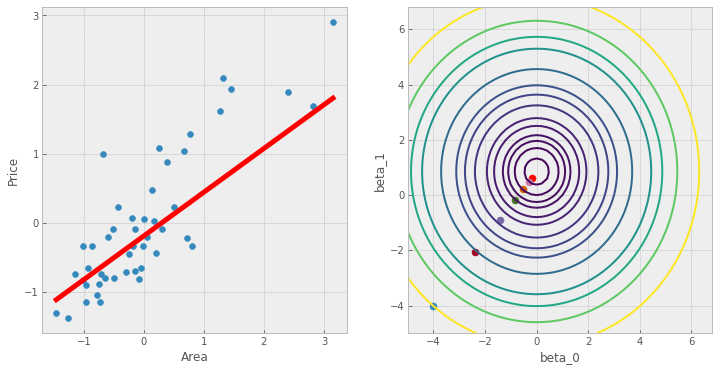



Linear Regression with betas  [-0.11033476  0.72106912]


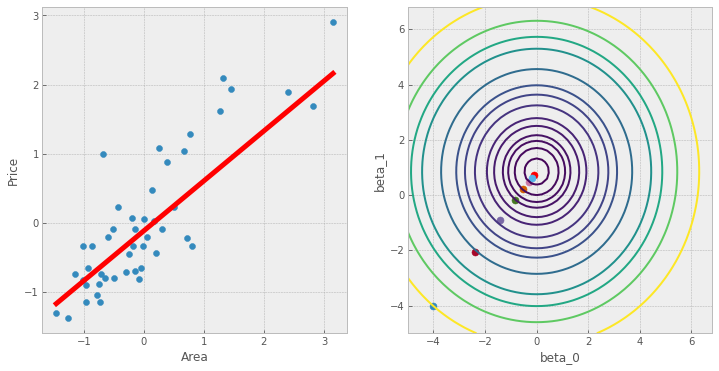



Linear Regression with betas  [-0.0660615   0.77480566]


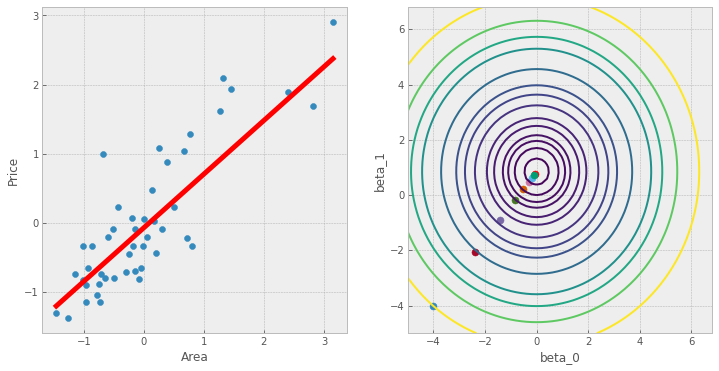



Linear Regression with betas  [-0.03955346  0.8069797 ]


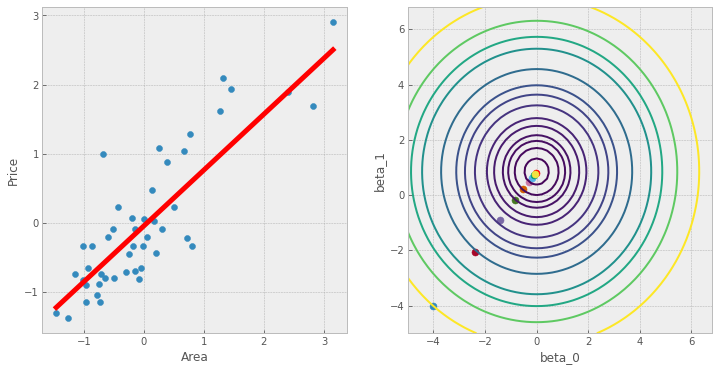

In [29]:
for i, beta in enumerate(betas_):
    print('\n\nLinear Regression with betas ', beta)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
    ax2.contour(beta0, beta1, cost_func.T.values, contour_levels)
    ax2.set_xlabel('beta_0')
    ax2.set_ylabel('beta_1')
    ax2.scatter(beta[0], beta[1], c='r', s=50)
    
    if i > 0:
        for beta_ in betas_[:i]:
            ax2.scatter(beta_[0], beta_[1], s=50)

    # scatter plot
    ax1.scatter(X, y)

    # Plot the linear regression
    x = np.c_[np.ones(2), [X.min(), X.max()]]
    ax1.plot(x[:, 1], lr_h(beta, x), 'r', lw=5)
    ax1.set_xlabel('Area')
    ax1.set_ylabel('Price')
    plt.show()

Betas estimadas

In [30]:
betas[-1, :-1]

array([-0.02492854,  0.82473065])

## Ecuaciones normales (alias OLS)

¡Determinista!

## $$ \beta = (X^T X)^{-1} X^T Y $$


In [31]:
beta = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))

In [32]:
beta

array([-6.75111258e-17,  8.54987593e-01])

# Estimando la regresión usando sklearn

### Utilizando OLS

In [33]:
# import
from sklearn.linear_model import LinearRegression

In [34]:
# Initialize
linreg = LinearRegression(fit_intercept=False)

In [35]:
# Fit
linreg.fit(X_, y)

LinearRegression(fit_intercept=False)

In [36]:
linreg.coef_

array([-9.71656032e-17,  8.54987593e-01])

### Usando el Descenso Gradiente (Estocástico)

*Se diferencia del descenso de gradiente normal al actualizar los pesos con cada ejemplo. Esto converge más rápido para grandes conjuntos de datos

In [37]:
# import
from sklearn.linear_model import SGDRegressor

In [38]:
# Initialize
linreg2 = SGDRegressor(fit_intercept=False, max_iter=500,tol = 0.0000001)

In [39]:
# Fit
linreg2.fit(X_, y)

SGDRegressor(fit_intercept=False, max_iter=500, tol=1e-07)

In [40]:
linreg2.coef_

array([-2.30161852e-04,  8.53701677e-01])

# Comparando MCO vs GD

|Descenso de Gradientes|Ecuación Normal
| :------------- | :------------- |
| Necesita elegir $\alpha$| No necesita elegir $\alpha$|
|Necesita muchas iteraciones. |No necesita iterar.|
|Funciona bien incluso cuando $k$ es grande.| Es lento si $k$ es muy grande.|
||Necesita calcular $(X^TX)^{-1}$$.|
|Escalable | No escalable*|

*   Elemento de lista
*   Elemento de lista



*Aplicar esto a la regresión lineal fue bastante fácil ya que teníamos buenos coeficientes y ecuaciones lineales. ¿Y cuándo no?
[Un poco más del tema](https://towardsdatascience.com/https-medium-com-chayankathuria-optimization-ordinary-least-squares-gradient-descent-from-scratch-8b48151ba756)

# Regresión lineal con variables múltiples

Vamos a crear una nueva figura $ area^2 $

In [41]:
data['area2'] = data['area'] ** 2
data.head()

,area,bedroom,price,area2
0,2104,3,399900,4426816
1,1600,3,329900,2560000
2,2400,3,369000,5760000
3,1416,2,232000,2005056
4,3000,4,539900,9000000


### Revisión de la notación

 * n = n_muestras = número de ejemplos
 * k = número de características
 * y = precio
 * $x^{(i)}$ = características del ejemplo $i

In [42]:
i = 2
data.loc[2, ['area', 'area2']]

area        2400
area2    5760000
Name: 2, dtype: int64

* $x_j^{(i)}$ = valor de la característica $j$ del ejemplo $i$

In [43]:
i = 2
j = 2
data.loc[2, 'area2']

5760000

### Hipótesis:

* Previamente:

### $$ h_\beta(x) = \beta_0 + \beta_1 x_1 $$

donde $x_1$ = area

* Ahora:

### $$ h_\beta(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$
donde $x_2$ = $area^2$

### Crear una nueva matriz X y escalar

In [44]:
X = data[['area', 'area2']].values
X[0:5]

array([[   2104, 4426816],
       [   1600, 2560000],
       [   2400, 5760000],
       [   1416, 2005056],
       [   3000, 9000000]])

In [45]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


(array([2.00068085e+03, 4.62083843e+06]),
 array([7.86202619e+02, 4.05394589e+06]))

In [46]:
X[0:5]

array([[ 0.13141542, -0.04786014],
       [-0.5096407 , -0.50835371],
       [ 0.5079087 ,  0.28100069],
       [-0.74367706, -0.64524355],
       [ 1.27107075,  1.08022201]])

In [47]:
X_ = np.c_[np.ones(n_samples), X]
X_[0:5]

array([[ 1.        ,  0.13141542, -0.04786014],
       [ 1.        , -0.5096407 , -0.50835371],
       [ 1.        ,  0.5079087 ,  0.28100069],
       [ 1.        , -0.74367706, -0.64524355],
       [ 1.        ,  1.27107075,  1.08022201]])

### Función de coste

El objetivo se convirtió en estimar los parámetros $\beta$ que minimizan la suma de los residuos al cuadrado

### $$J(\beta)=\frac{1}{2n}\sum_{i=1}^n (h_\beta(x^{(i)})-y_i)^2$$


### $$h_\beta(x^{(i)}) = \sum_{j=0}^k \beta_j  x_j^{(i)}$$


### $$J(\beta)=\frac{1}{2n}\sum_{i=1}^n \left( \left( \sum_{j=0}^k \beta_j  x_j^{(i)}\right) -y_i \right)^2$$

Nótese que $x^0$ se refiere a la columna de unos

### Algoritmo de descenso gradual

Repetir hasta la convergencia{

### $$ \beta_j := \beta_j - \alpha \frac{\partial }{\partial \beta_j} J(\beta)$$


}
mientras se actualiza simultáneamente j=0..k

$\alpha$ se denomina tasa de aprendizaje

In [48]:
beta_ini = np.array([0., 0., 0.])

# gradient calculation
def gradient(beta, x, y):
    return 1 / x.shape[0] * np.dot((lr_h(beta, x) - y).T, x)

gradient(beta_ini, X_, y)

array([ 9.44870659e-17, -8.54987593e-01, -8.33162685e-01])

Text(0, 0.5, 'J(beta)')

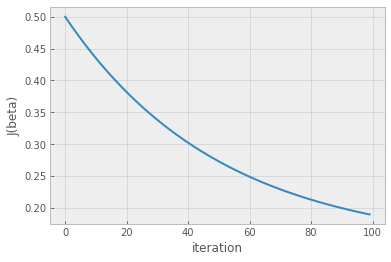

In [49]:
beta_ini = np.array([0., 0., 0.])
alpha = 0.005
iters = 100
betas = gradient_descent(X_, y, beta_ini, alpha, iters)

# Print iteration vs J
plt.plot(range(iters), betas[:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)')

Aparentemente la función de coste no está convergiendo 

Cambiemos alfa y aumentemos el número de iteraciones

Text(0, 0.5, 'J(beta)')

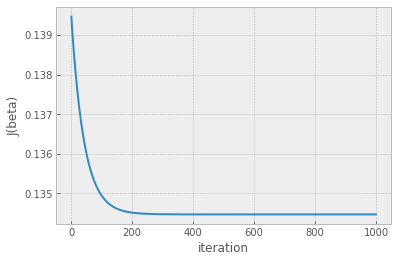

In [50]:
beta_ini = np.array([0., 0., 0.])
alpha = 0.5
iters = 1000
betas = gradient_descent(X_, y, beta_ini, alpha, iters)

# Print iteration vs J
plt.plot(range(1,iters), betas[1:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)')

In [51]:
print('betas using gradient descent\n', betas[-1, :-1])

betas using gradient descent
 [-9.21248893e-17  8.91147493e-01 -3.70307030e-02]


### Usando las ecuaciones normales

In [52]:
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols

array([-8.21301897e-17,  8.91150925e-01, -3.70341353e-02])

Diferencia

In [53]:
betas_ols - betas[-1, :-1]

array([ 9.99469961e-18,  3.43234288e-06, -3.43234289e-06])

# Hacer predicciones

Predecir el precio cuando el área es de 3000

_Nota: recuerde que la matriz X está escalada_

In [54]:
x = np.array([3000., 3000.**2])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
x_

array([[1.        , 1.27107075, 1.08022201]])

In [55]:
y_pred = lr_h(betas_ols, x_)
y_pred

array([1.09271078])

In [56]:
y_pred = y_pred * y_std + y_mean
y_pred

array([475583.75451797])

# Using sklearn

In [57]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

clf1 = LinearRegression()

Cuando se utiliza sklearn no es necesario crear la intercepción

También sklearn funciona con pandas

In [58]:
clf1.fit(data[['area', 'area2']], data[' price'])

LinearRegression()

In [62]:
clf1.predict(x.reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([475583.75451797])

# Comparación de la regresión lineal con otros modelos

Ventajas de la regresión lineal

- Simple de explicar
- Muy interpretable
- El entrenamiento y la predicción del modelo son rápidos
- No se requiere ningún ajuste (excluyendo la regularización)
- Las características no necesitan ser escaladas
- Puede funcionar bien con un número reducido de observaciones
- Se entiende bien

Desventajas de la regresión lineal:

- Presume una relación lineal entre las características y la respuesta
- El rendimiento no es (generalmente) competitivo con los mejores métodos de aprendizaje supervisado debido al alto sesgo
- No puede aprender automáticamente las interacciones de las características